In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import random
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('train_2017.csv', nrows=100000)

In [3]:
# Test Data
test_2017 = pd.read_csv('test_2017.csv', nrows=100000)
test_2017 = test_2017[test_2017['Trip Seconds'].notna()]
test_2017 = test_2017[test_2017['Trip Miles'].notna()]
test_2017 = test_2017[test_2017['Fare'].notna()]
test_2017 = test_2017[test_2017['Trip Start Timestamp'].notna()]
test_2017['month'] = pd.to_datetime(test_2017['Trip Start Timestamp']).dt.month
x_test = test_2017[['Trip Seconds', 'Trip Miles', 'month']].to_numpy()
y_test = test_2017['Fare'].to_numpy()

In [4]:
# Train/Val Data
df_train = df_train[df_train['Trip Seconds'].notna()]
df_train = df_train[df_train['Trip Miles'].notna()]
df_train = df_train[df_train['Fare'].notna()]
df_train = df_train[df_train['Trip Start Timestamp'].notna()]
df_train['month'] = pd.to_datetime(df_train['Trip Start Timestamp']).dt.month
x = df_train[['Trip Seconds', 'Trip Miles', 'month']].to_numpy()
y = df_train['Fare'].to_numpy()

# 1 Hidden Layer, MSE, 32 Input, 64 Hidden

In [5]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 165.0017 - mae: 4.8216 - mse: 165.0017 - val_loss: 169.7112 - val_mae: 6.5061 - val_mse: 169.7112 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 2s - loss: 90.2738 - mae: 3.7142 - mse: 90.2738 - val_loss: 78.3531 - val_mae: 2.3766 - val_mse: 78.3531 - 2s/epoch - 888us/step
Epoch 3/100
2500/2500 - 2s - loss: 76.8868 - mae: 2.9632 - mse: 76.8868 - val_loss: 88.3482 - val_mae: 2.3823 - val_mse: 88.3482 - 2s/epoch - 894us/step
Epoch 4/100
2500/2500 - 2s - loss: 81.2935 - mae: 3.1441 - mse: 81.2935 - val_loss: 89.3915 - val_mae: 2.7682 - val_mse: 89.3915 - 2s/epoch - 881us/step
Epoch 5/100
2500/2500 - 2s - loss: 73.8348 - mae: 3.0108 - mse: 73.8348 - val_loss: 77.5194 - val_mae: 2.3114 - val_mse: 77.5194 - 2s/epoch - 881us/step
Epoch 6/100
2500/2500 - 2s - loss: 71.5689 - mae: 2.8003 - mse: 71.5689 - val_loss: 80.1410 - val_mae: 2.2021 - val_mse: 80.1410 - 2s/epoch - 891us/step
Epoch 7/100
2500/2500 - 2s - loss: 68.1788 - mae: 2.6553 - mse: 68.1788 - val_lo

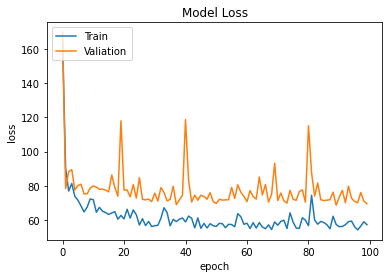

In [6]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

/common/home/pr446/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


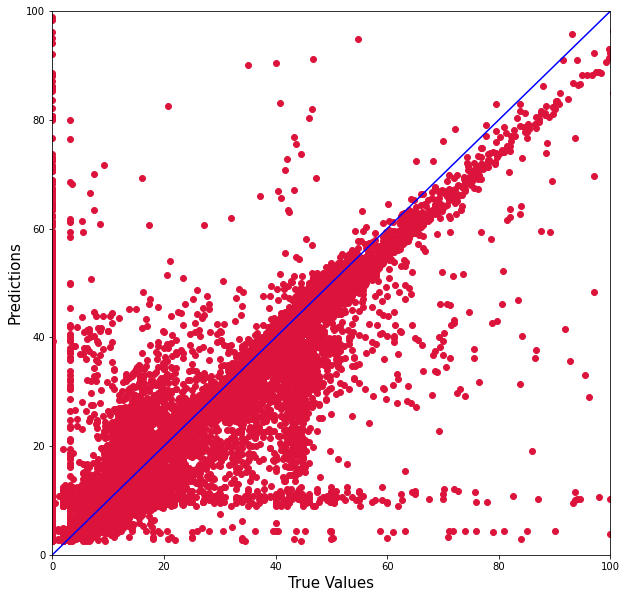

In [7]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [8]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 584us/step - loss: 351.9887 - mae: 1.6586 - mse: 351.9887


[351.98870849609375, 1.6585514545440674, 351.98870849609375]

# 2 Hidden Layers, MSE, 32 Input, 64 Hidden

In [6]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 142.8089 - mae: 4.5138 - mse: 142.8089 - val_loss: 98.6797 - val_mae: 3.7835 - val_mse: 98.6797 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 3s - loss: 89.1669 - mae: 3.3147 - mse: 89.1669 - val_loss: 79.8030 - val_mae: 2.3308 - val_mse: 79.8030 - 3s/epoch - 1ms/step
Epoch 3/100
2500/2500 - 3s - loss: 89.3273 - mae: 3.3307 - mse: 89.3273 - val_loss: 79.6643 - val_mae: 2.4165 - val_mse: 79.6643 - 3s/epoch - 1ms/step
Epoch 4/100
2500/2500 - 3s - loss: 92.3314 - mae: 3.4350 - mse: 92.3314 - val_loss: 95.2087 - val_mae: 3.5556 - val_mse: 95.2087 - 3s/epoch - 1ms/step
Epoch 5/100
2500/2500 - 3s - loss: 71.6751 - mae: 2.7249 - mse: 71.6751 - val_loss: 88.2819 - val_mae: 2.9418 - val_mse: 88.2819 - 3s/epoch - 1ms/step
Epoch 6/100
2500/2500 - 3s - loss: 74.6271 - mae: 2.7782 - mse: 74.6271 - val_loss: 83.7741 - val_mae: 2.3047 - val_mse: 83.7741 - 3s/epoch - 1ms/step
Epoch 7/100
2500/2500 - 3s - loss: 76.2200 - mae: 2.8066 - mse: 76.2200 - val_loss: 119.3568

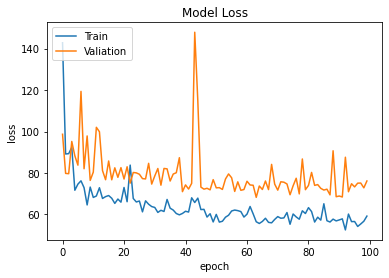

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [8]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 604us/step - loss: 362.0213 - mae: 2.4455 - mse: 362.0213


[362.0213317871094, 2.4455175399780273, 362.0213317871094]

# 3 Hidden Layers, MSE, 32 Input, 64 Hidden

In [9]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 153.1394 - mae: 4.6617 - mse: 153.1394 - val_loss: 105.9240 - val_mae: 3.0324 - val_mse: 105.9240 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 3s - loss: 88.8465 - mae: 3.4302 - mse: 88.8465 - val_loss: 98.2420 - val_mae: 2.9882 - val_mse: 98.2420 - 3s/epoch - 1ms/step
Epoch 3/100
2500/2500 - 3s - loss: 89.8909 - mae: 3.4733 - mse: 89.8909 - val_loss: 78.4763 - val_mae: 2.2737 - val_mse: 78.4763 - 3s/epoch - 1ms/step
Epoch 4/100
2500/2500 - 3s - loss: 79.8501 - mae: 2.9791 - mse: 79.8501 - val_loss: 95.8191 - val_mae: 2.3872 - val_mse: 95.8191 - 3s/epoch - 1ms/step
Epoch 5/100
2500/2500 - 3s - loss: 77.5588 - mae: 3.0482 - mse: 77.5588 - val_loss: 78.9276 - val_mae: 2.4087 - val_mse: 78.9276 - 3s/epoch - 1ms/step
Epoch 6/100
2500/2500 - 3s - loss: 67.5373 - mae: 2.7533 - mse: 67.5373 - val_loss: 82.8614 - val_mae: 2.3274 - val_mse: 82.8614 - 3s/epoch - 1ms/step
Epoch 7/100
2500/2500 - 3s - loss: 75.5402 - mae: 2.6159 - mse: 75.5402 - val_loss: 77.336

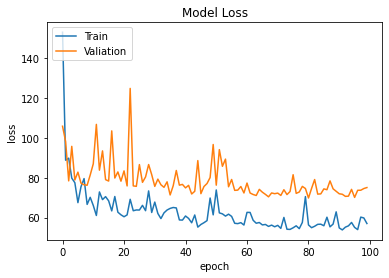

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [11]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 607us/step - loss: 354.5584 - mae: 2.5173 - mse: 354.5584


[354.55841064453125, 2.5172617435455322, 354.55841064453125]

# 1 Hidden Layer, MAE, 32 Input, 64 Hidden

In [12]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 2.1390 - mae: 2.1390 - mse: 88.9454 - val_loss: 1.6291 - val_mae: 1.6291 - val_mse: 86.2489 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 2s - loss: 1.6515 - mae: 1.6515 - mse: 78.8421 - val_loss: 1.5349 - val_mae: 1.5349 - val_mse: 89.7619 - 2s/epoch - 901us/step
Epoch 3/100
2500/2500 - 2s - loss: 1.5767 - mae: 1.5767 - mse: 82.1825 - val_loss: 1.5019 - val_mae: 1.5019 - val_mse: 87.7420 - 2s/epoch - 861us/step
Epoch 4/100
2500/2500 - 2s - loss: 1.6059 - mae: 1.6059 - mse: 80.1724 - val_loss: 1.8609 - val_mae: 1.8609 - val_mse: 119.5068 - 2s/epoch - 842us/step
Epoch 5/100
2500/2500 - 2s - loss: 1.5521 - mae: 1.5521 - mse: 89.2006 - val_loss: 1.5162 - val_mae: 1.5162 - val_mse: 92.7564 - 2s/epoch - 835us/step
Epoch 6/100
2500/2500 - 2s - loss: 1.5110 - mae: 1.5110 - mse: 84.0581 - val_loss: 1.7307 - val_mae: 1.7307 - val_mse: 87.2549 - 2s/epoch - 901us/step
Epoch 7/100
2500/2500 - 2s - loss: 1.5652 - mae: 1.5652 - mse: 80.2966 - val_loss: 1.4668 - val

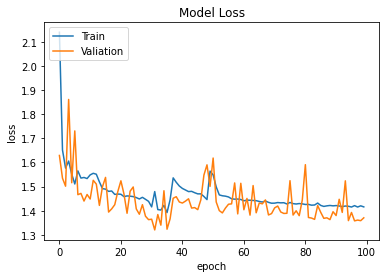

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [14]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 563us/step - loss: 1.4804 - mae: 1.4804 - mse: 378.2919


[1.4803718328475952, 1.4803718328475952, 378.2918701171875]

# 2 Hidden Layers, MAE, 32 Input, 64 Hidden

In [15]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 2.1469 - mae: 2.1469 - mse: 103.2177 - val_loss: 1.6179 - val_mae: 1.6179 - val_mse: 97.4897 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 3s - loss: 1.6219 - mae: 1.6219 - mse: 84.5305 - val_loss: 1.6485 - val_mae: 1.6485 - val_mse: 94.0391 - 3s/epoch - 1ms/step
Epoch 3/100
2500/2500 - 3s - loss: 1.5940 - mae: 1.5940 - mse: 84.5744 - val_loss: 1.4596 - val_mae: 1.4596 - val_mse: 94.6210 - 3s/epoch - 1ms/step
Epoch 4/100
2500/2500 - 3s - loss: 1.5476 - mae: 1.5476 - mse: 86.7723 - val_loss: 1.4597 - val_mae: 1.4597 - val_mse: 97.5025 - 3s/epoch - 1ms/step
Epoch 5/100
2500/2500 - 3s - loss: 1.5243 - mae: 1.5243 - mse: 86.6150 - val_loss: 1.4800 - val_mae: 1.4800 - val_mse: 105.4096 - 3s/epoch - 1ms/step
Epoch 6/100
2500/2500 - 3s - loss: 1.5332 - mae: 1.5332 - mse: 83.7218 - val_loss: 1.4024 - val_mae: 1.4024 - val_mse: 106.3165 - 3s/epoch - 1ms/step
Epoch 7/100
2500/2500 - 3s - loss: 1.5265 - mae: 1.5265 - mse: 84.2425 - val_loss: 1.5302 - val_mae: 1.

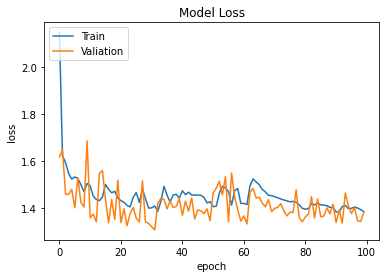

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [17]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 606us/step - loss: 1.4919 - mae: 1.4919 - mse: 375.5572


[1.4919240474700928, 1.4919240474700928, 375.5571594238281]

# 3 Hidden Layers, MAE, 32 Input, 64 Hidden

In [18]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 2.2253 - mae: 2.2253 - mse: 116.8495 - val_loss: 1.8552 - val_mae: 1.8552 - val_mse: 95.8368 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 3s - loss: 1.5890 - mae: 1.5890 - mse: 85.9628 - val_loss: 1.4412 - val_mae: 1.4412 - val_mse: 92.2806 - 3s/epoch - 1ms/step
Epoch 3/100
2500/2500 - 3s - loss: 1.5944 - mae: 1.5944 - mse: 80.7638 - val_loss: 1.4247 - val_mae: 1.4247 - val_mse: 91.8906 - 3s/epoch - 1ms/step
Epoch 4/100
2500/2500 - 3s - loss: 1.5615 - mae: 1.5615 - mse: 83.7884 - val_loss: 1.5829 - val_mae: 1.5829 - val_mse: 114.1842 - 3s/epoch - 1ms/step
Epoch 5/100
2500/2500 - 3s - loss: 1.5377 - mae: 1.5377 - mse: 84.8739 - val_loss: 1.4636 - val_mae: 1.4636 - val_mse: 100.4672 - 3s/epoch - 1ms/step
Epoch 6/100
2500/2500 - 3s - loss: 1.5201 - mae: 1.5201 - mse: 92.5266 - val_loss: 1.4999 - val_mae: 1.4999 - val_mse: 91.5314 - 3s/epoch - 1ms/step
Epoch 7/100
2500/2500 - 3s - loss: 1.5417 - mae: 1.5417 - mse: 82.0793 - val_loss: 1.5785 - val_mae: 1.

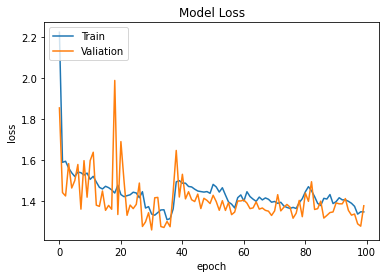

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

In [20]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 627us/step - loss: 1.4646 - mae: 1.4646 - mse: 372.4142


[1.4646453857421875, 1.4646453857421875, 372.4141540527344]

# 1 Hidden Layer, MSE, 16 Input, 32 Hidden

In [9]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 2s - loss: 167.7592 - mae: 5.0143 - mse: 167.7592 - val_loss: 116.2906 - val_mae: 4.0190 - val_mse: 116.2906 - 2s/epoch - 927us/step
Epoch 2/100
2500/2500 - 2s - loss: 96.7411 - mae: 3.6742 - mse: 96.7411 - val_loss: 83.7571 - val_mae: 2.3394 - val_mse: 83.7571 - 2s/epoch - 782us/step
Epoch 3/100
2500/2500 - 2s - loss: 76.2388 - mae: 2.7831 - mse: 76.2388 - val_loss: 79.8898 - val_mae: 2.0546 - val_mse: 79.8898 - 2s/epoch - 769us/step
Epoch 4/100
2500/2500 - 2s - loss: 77.8176 - mae: 2.9521 - mse: 77.8176 - val_loss: 173.4328 - val_mae: 6.4331 - val_mse: 173.4328 - 2s/epoch - 768us/step
Epoch 5/100
2500/2500 - 2s - loss: 77.9691 - mae: 3.1289 - mse: 77.9691 - val_loss: 79.0622 - val_mae: 2.3590 - val_mse: 79.0622 - 2s/epoch - 765us/step
Epoch 6/100
2500/2500 - 2s - loss: 71.0486 - mae: 2.7736 - mse: 71.0486 - val_loss: 82.2068 - val_mae: 2.2832 - val_mse: 82.2068 - 2s/epoch - 749us/step
Epoch 7/100
2500/2500 - 2s - loss: 72.5468 - mae: 3.0238 - mse: 72.5468 - va

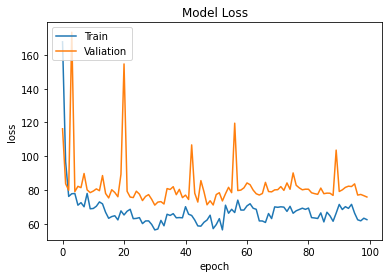

In [10]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

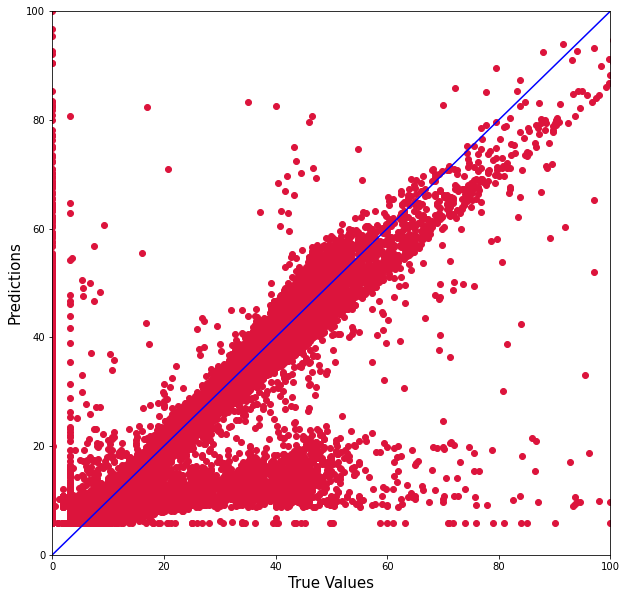

In [11]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [12]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 589us/step - loss: 359.6574 - mae: 2.0387 - mse: 359.6574


[359.6573791503906, 2.038709878921509, 359.6573791503906]

# 2 Hidden Layers, MSE, 16 Input, 32 Hidden

In [13]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 168.6931 - mae: 4.9693 - mse: 168.6931 - val_loss: 130.3433 - val_mae: 3.9456 - val_mse: 130.3433 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 2s - loss: 111.6483 - mae: 4.4957 - mse: 111.6483 - val_loss: 83.7923 - val_mae: 2.8656 - val_mse: 83.7923 - 2s/epoch - 874us/step
Epoch 3/100
2500/2500 - 2s - loss: 77.5060 - mae: 3.0460 - mse: 77.5060 - val_loss: 86.9618 - val_mae: 2.9759 - val_mse: 86.9618 - 2s/epoch - 903us/step
Epoch 4/100
2500/2500 - 2s - loss: 75.1868 - mae: 2.8542 - mse: 75.1868 - val_loss: 99.5317 - val_mae: 3.8543 - val_mse: 99.5317 - 2s/epoch - 873us/step
Epoch 5/100
2500/2500 - 2s - loss: 77.9637 - mae: 2.7891 - mse: 77.9637 - val_loss: 91.2278 - val_mae: 3.1318 - val_mse: 91.2278 - 2s/epoch - 887us/step
Epoch 6/100
2500/2500 - 2s - loss: 68.6168 - mae: 2.6288 - mse: 68.6168 - val_loss: 86.4903 - val_mae: 2.6389 - val_mse: 86.4903 - 2s/epoch - 876us/step
Epoch 7/100
2500/2500 - 2s - loss: 77.9893 - mae: 3.3428 - mse: 77.9893 - val_

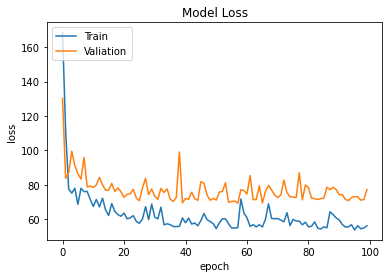

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

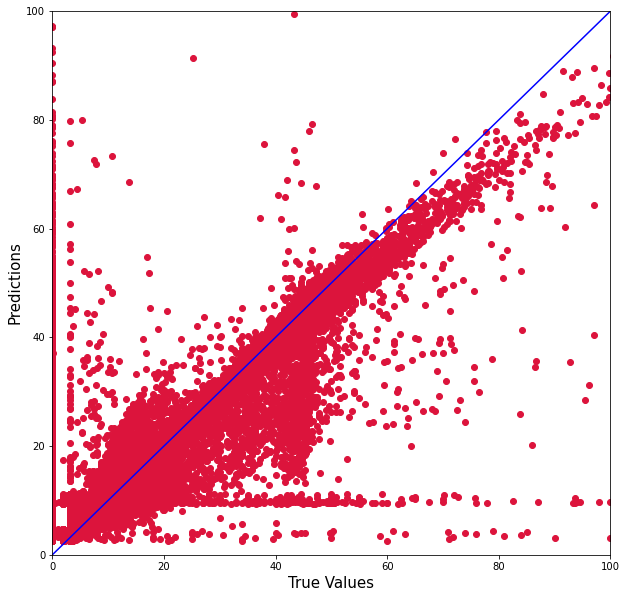

In [15]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [16]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 594us/step - loss: 362.0785 - mae: 1.7493 - mse: 362.0785


[362.0785217285156, 1.749343991279602, 362.0785217285156]

# 3 Hidden Layers, MSE, 16 Input, 32 Hidden

In [17]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 182.6308 - mae: 5.2961 - mse: 182.6308 - val_loss: 120.9933 - val_mae: 4.3942 - val_mse: 120.9933 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 2s - loss: 97.3544 - mae: 3.9566 - mse: 97.3544 - val_loss: 79.9150 - val_mae: 2.2751 - val_mse: 79.9150 - 2s/epoch - 974us/step
Epoch 3/100
2500/2500 - 3s - loss: 76.2188 - mae: 2.8148 - mse: 76.2188 - val_loss: 78.2202 - val_mae: 2.1753 - val_mse: 78.2202 - 3s/epoch - 1ms/step
Epoch 4/100
2500/2500 - 2s - loss: 69.7150 - mae: 2.6772 - mse: 69.7150 - val_loss: 94.0341 - val_mae: 3.1206 - val_mse: 94.0341 - 2s/epoch - 996us/step
Epoch 5/100
2500/2500 - 3s - loss: 71.5276 - mae: 2.7369 - mse: 71.5276 - val_loss: 78.0466 - val_mae: 2.2089 - val_mse: 78.0466 - 3s/epoch - 1ms/step
Epoch 6/100
2500/2500 - 2s - loss: 75.9144 - mae: 2.9147 - mse: 75.9144 - val_loss: 83.1960 - val_mae: 2.8499 - val_mse: 83.1960 - 2s/epoch - 988us/step
Epoch 7/100
2500/2500 - 2s - loss: 66.2619 - mae: 2.4704 - mse: 66.2619 - val_loss: 

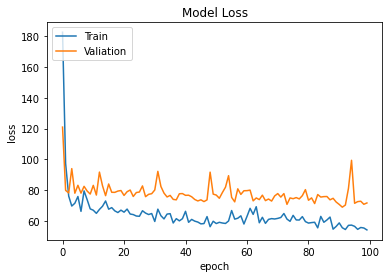

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

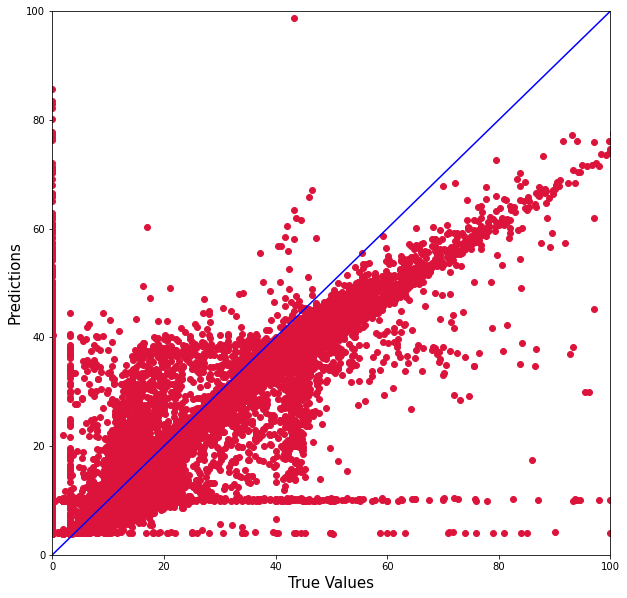

In [19]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [20]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 606us/step - loss: 352.0563 - mae: 2.2142 - mse: 352.0563


[352.0562744140625, 2.2142012119293213, 352.0562744140625]

# 1 Hidden Layers, MAE, 16 Input, 32 Hidden

In [21]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 2s - loss: 2.3353 - mae: 2.3353 - mse: 113.3175 - val_loss: 1.4823 - val_mae: 1.4823 - val_mse: 94.7706 - 2s/epoch - 960us/step
Epoch 2/100
2500/2500 - 2s - loss: 1.5845 - mae: 1.5845 - mse: 86.1101 - val_loss: 1.6671 - val_mae: 1.6671 - val_mse: 90.4204 - 2s/epoch - 804us/step
Epoch 3/100
2500/2500 - 2s - loss: 1.5432 - mae: 1.5432 - mse: 86.4514 - val_loss: 1.6393 - val_mae: 1.6393 - val_mse: 87.2238 - 2s/epoch - 815us/step
Epoch 4/100
2500/2500 - 2s - loss: 1.5508 - mae: 1.5508 - mse: 82.8643 - val_loss: 1.4398 - val_mae: 1.4398 - val_mse: 90.0698 - 2s/epoch - 801us/step
Epoch 5/100
2500/2500 - 2s - loss: 1.5749 - mae: 1.5749 - mse: 79.2912 - val_loss: 1.4445 - val_mae: 1.4445 - val_mse: 89.5587 - 2s/epoch - 746us/step
Epoch 6/100
2500/2500 - 2s - loss: 1.5321 - mae: 1.5321 - mse: 83.4744 - val_loss: 1.4620 - val_mae: 1.4620 - val_mse: 92.3449 - 2s/epoch - 778us/step
Epoch 7/100
2500/2500 - 2s - loss: 1.5057 - mae: 1.5057 - mse: 86.2604 - val_loss: 1.7842 - v

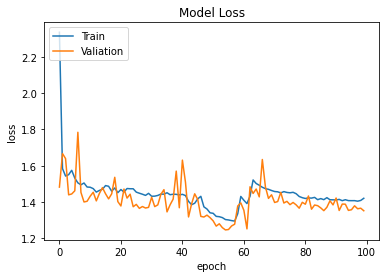

In [22]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

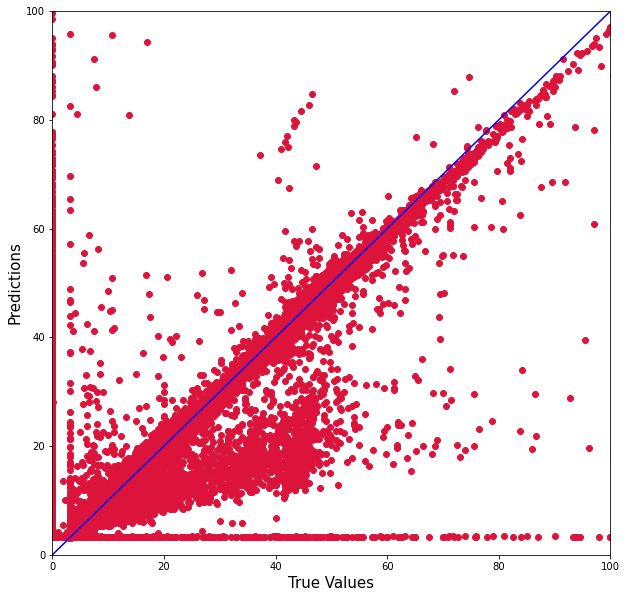

In [23]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [24]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 596us/step - loss: 1.4675 - mae: 1.4675 - mse: 384.5418


[1.4675281047821045, 1.4675281047821045, 384.54180908203125]

# 2 Hidden Layers, MAE, 16 Input, 32 Hidden

In [25]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 2.3347 - mae: 2.3347 - mse: 127.1660 - val_loss: 1.5453 - val_mae: 1.5453 - val_mse: 98.8807 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 2s - loss: 1.5682 - mae: 1.5682 - mse: 90.2502 - val_loss: 1.5101 - val_mae: 1.5101 - val_mse: 93.9125 - 2s/epoch - 887us/step
Epoch 3/100
2500/2500 - 2s - loss: 1.5407 - mae: 1.5407 - mse: 88.8575 - val_loss: 1.5005 - val_mae: 1.5005 - val_mse: 94.7809 - 2s/epoch - 868us/step
Epoch 4/100
2500/2500 - 2s - loss: 1.5137 - mae: 1.5137 - mse: 87.7836 - val_loss: 1.4174 - val_mae: 1.4174 - val_mse: 91.5117 - 2s/epoch - 877us/step
Epoch 5/100
2500/2500 - 2s - loss: 1.5083 - mae: 1.5083 - mse: 88.9737 - val_loss: 1.4585 - val_mae: 1.4585 - val_mse: 92.0270 - 2s/epoch - 882us/step
Epoch 6/100
2500/2500 - 2s - loss: 1.5050 - mae: 1.5050 - mse: 86.6278 - val_loss: 1.4251 - val_mae: 1.4251 - val_mse: 96.0175 - 2s/epoch - 883us/step
Epoch 7/100
2500/2500 - 2s - loss: 1.4886 - mae: 1.4886 - mse: 87.7485 - val_loss: 1.5108 - val

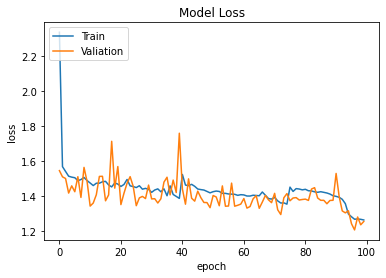

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

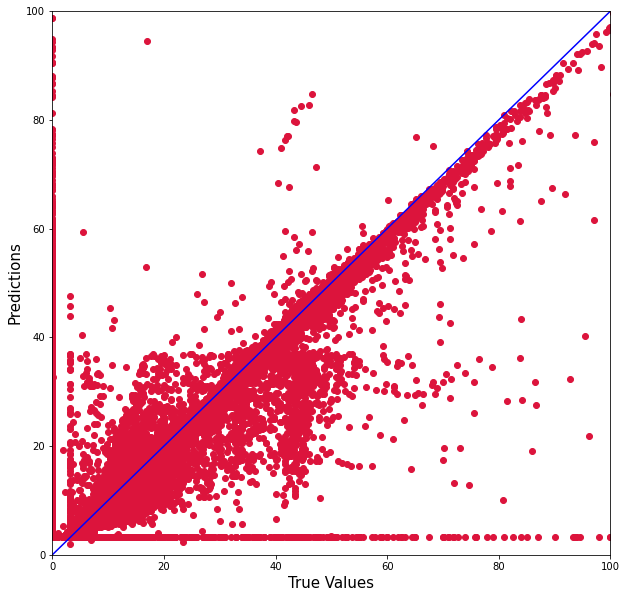

In [27]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [28]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 597us/step - loss: 1.3296 - mae: 1.3296 - mse: 354.4642


[1.3295818567276, 1.3295818567276, 354.46417236328125]

# 3 Hidden Layers, MAE, 16 Input, 32 Hidden

In [29]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(16, kernel_initializer='normal',input_dim = 3, activation='relu'))

# The Hidden Layer :
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(32, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

NN_model.compile(loss='mae', optimizer='adam', metrics=['mae', 'mse'])


history = NN_model.fit(x,
                       y,
                       epochs=100,
                       verbose=2,
                       validation_split=0.2)

Epoch 1/100
2500/2500 - 3s - loss: 2.2200 - mae: 2.2200 - mse: 103.8962 - val_loss: 1.4691 - val_mae: 1.4691 - val_mse: 89.4453 - 3s/epoch - 1ms/step
Epoch 2/100
2500/2500 - 2s - loss: 1.6305 - mae: 1.6305 - mse: 79.2364 - val_loss: 1.8704 - val_mae: 1.8704 - val_mse: 92.9477 - 2s/epoch - 1000us/step
Epoch 3/100
2500/2500 - 2s - loss: 1.6659 - mae: 1.6659 - mse: 78.0093 - val_loss: 1.5312 - val_mae: 1.5312 - val_mse: 87.1369 - 2s/epoch - 946us/step
Epoch 4/100
2500/2500 - 2s - loss: 1.6227 - mae: 1.6227 - mse: 77.9301 - val_loss: 1.4655 - val_mae: 1.4655 - val_mse: 89.5533 - 2s/epoch - 957us/step
Epoch 5/100
2500/2500 - 2s - loss: 1.5597 - mae: 1.5597 - mse: 83.0658 - val_loss: 1.4144 - val_mae: 1.4144 - val_mse: 92.4018 - 2s/epoch - 970us/step
Epoch 6/100
2500/2500 - 2s - loss: 1.5135 - mae: 1.5135 - mse: 86.0981 - val_loss: 1.5281 - val_mae: 1.5281 - val_mse: 100.0496 - 2s/epoch - 943us/step
Epoch 7/100
2500/2500 - 2s - loss: 1.5291 - mae: 1.5291 - mse: 86.8565 - val_loss: 1.4968 - v

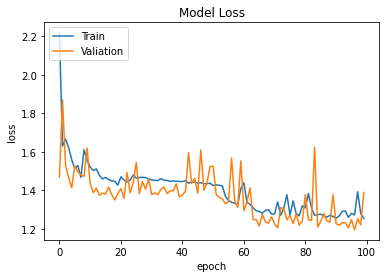

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Valiation'], loc='upper left')
plt.show()

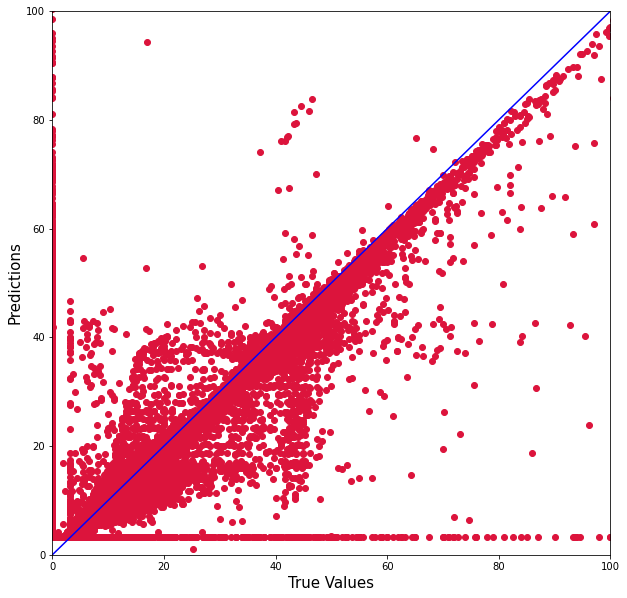

In [31]:
predictions = NN_model.predict(x_test)
plt.figure(figsize=(10,10))
plt.scatter(y_test, predictions, c='crimson')


p1 = max(max(predictions), max(y_test))
p2 = min(min(predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.xlim(0,100)
plt.ylim(0,100)
plt.show()

In [32]:
NN_model.evaluate(x_test, y_test)

3125/3125 [==============================] - 2s 618us/step - loss: 1.4569 - mae: 1.4569 - mse: 353.6361


[1.4568716287612915, 1.4568716287612915, 353.6360778808594]